In [31]:
#Imports
import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [32]:
#Reading Data

#Bitcoin_price, Ethereum_price

"""

Historical Price of Bitcoin, Historical Price of Ethereum

"""

bitcoin = pd.read_csv('/Users/Avanti/Desktop/INFX575/Project/Data/bitcoin_price.csv', parse_dates=['Date'])
ether = pd.read_csv('/Users/Avanti/Desktop/INFX575/Project/Data/ethereum_price.csv', parse_dates=['Date'])

In [33]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-10-03,4408.46,4432.47,4258.89,4317.48,"1,288,020,000","73,181,300,000"
1,2017-10-02,4395.81,4470.23,4377.46,4409.32,"1,431,730,000","72,963,200,000"
2,2017-10-01,4341.05,4403.74,4269.81,4403.74,"1,208,210,000","72,047,300,000"
3,2017-09-30,4166.11,4358.43,4160.86,4338.71,"1,207,450,000","69,136,600,000"
4,2017-09-29,4171.62,4214.63,4039.29,4163.07,"1,367,050,000","69,219,200,000"


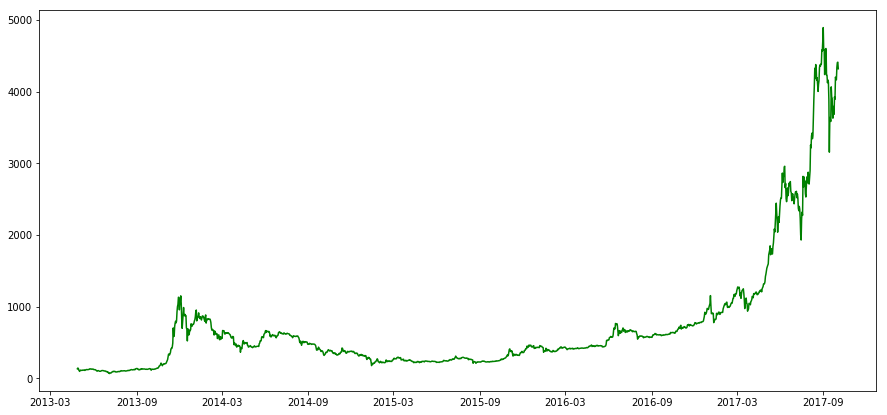

In [34]:
fig, ax = plt.subplots(ncols=1, figsize=(15,7))
ax.plot_date(bitcoin['Date'], bitcoin['Close'], linestyle='-', marker='', color='green')

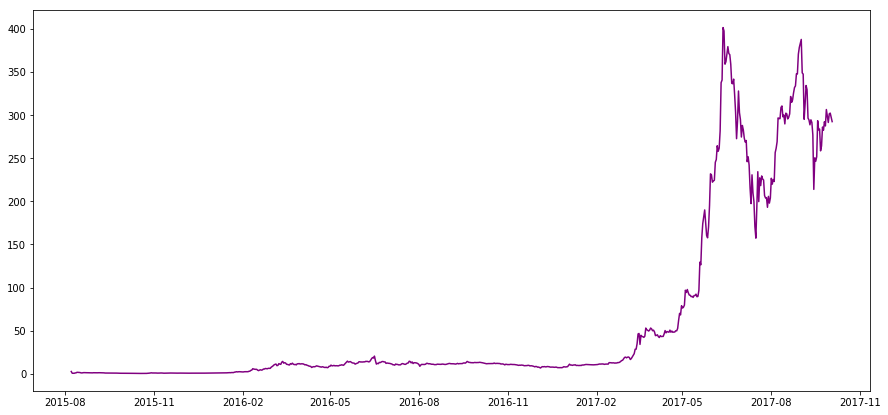

In [35]:
fig, ax = plt.subplots(ncols=1, figsize=(15,7))
ax.plot_date(ether['Date'], ether['Close'], linestyle='-', marker='', color='purple')

In [36]:
bitcoin_2015 = bitcoin[(pd.to_datetime(bitcoin['Date']) >= '2015-08-01')]

In [37]:
bitcoin_by_date = bitcoin_2015.groupby('Date').mean()

In [39]:
ether_by_date = ether.groupby('Date').mean()

In [40]:
bitcoin_by_date['Daily Return'] = bitcoin_by_date['Close'].pct_change()
ether_by_date['Daily Return'] = ether_by_date['Close'].pct_change()

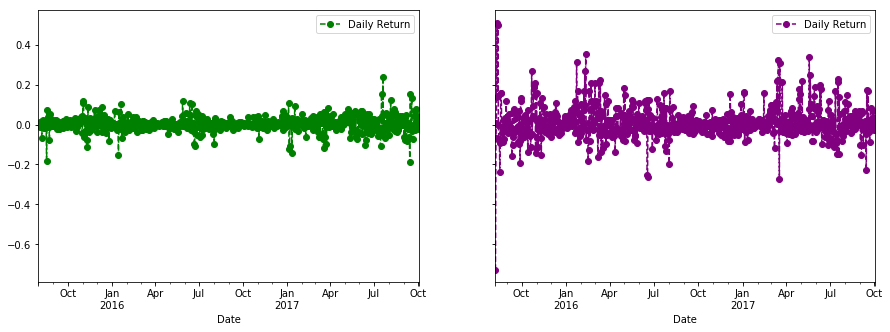

In [41]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
bitcoin_by_date['Daily Return'].plot(legend = True, linestyle='--', marker='o', ax=ax1, color='green')
ether_by_date['Daily Return'].plot(legend = True, linestyle='--', marker='o', ax=ax2, color='purple')

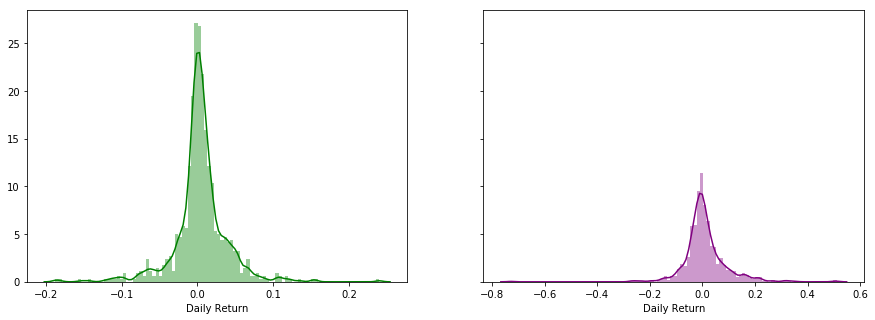

In [42]:
fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.distplot(bitcoin_by_date['Daily Return'].dropna(), bins = 100, color='green', ax=ax1)
sns.distplot(ether_by_date['Daily Return'].dropna(), bins = 100, color='purple', ax=ax2)

In [43]:
# Moving Averages
ma_day = [10,20,50]
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    bitcoin_by_date[column_name] = bitcoin_by_date['Close'].rolling(window=ma, center=False).mean()

In [44]:
for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    ether_by_date[column_name] = ether_by_date['Close'].rolling(window=ma, center=False).mean()

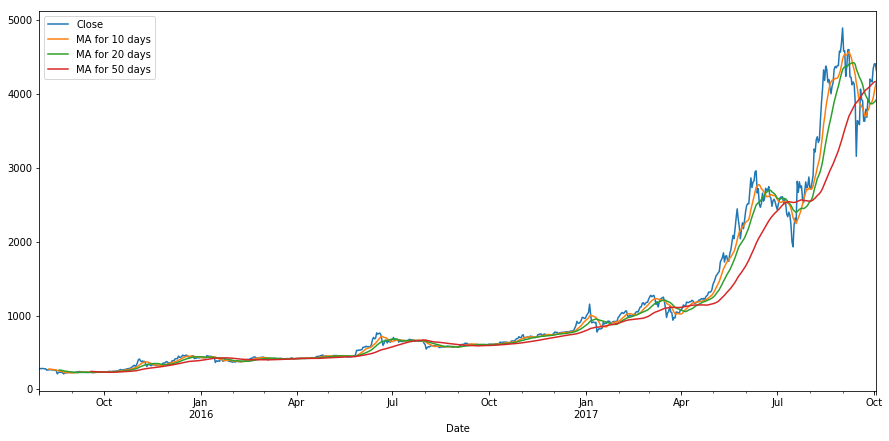

In [45]:
fig, ax = plt.subplots(ncols=1, figsize=(15,7))
bitcoin_by_date[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, ax=ax)

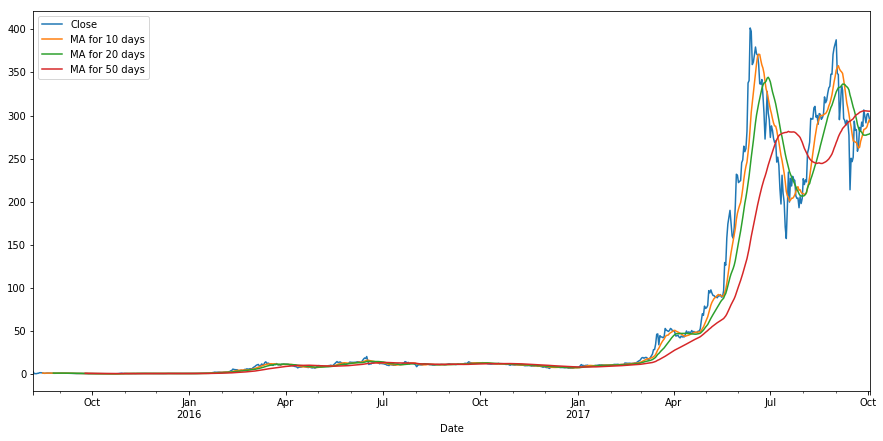

In [46]:
fig, ax = plt.subplots(ncols=1, figsize=(15,7))
ether_by_date[['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(subplots = False, ax=ax)

In [47]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-10-03,4408.46,4432.47,4258.89,4317.48,"1,288,020,000","73,181,300,000"
1,2017-10-02,4395.81,4470.23,4377.46,4409.32,"1,431,730,000","72,963,200,000"
2,2017-10-01,4341.05,4403.74,4269.81,4403.74,"1,208,210,000","72,047,300,000"
3,2017-09-30,4166.11,4358.43,4160.86,4338.71,"1,207,450,000","69,136,600,000"
4,2017-09-29,4171.62,4214.63,4039.29,4163.07,"1,367,050,000","69,219,200,000"


In [48]:
#Concatinating Bitcoin and Ethereum Closing Prices in a dataframe
closing_df = pd.concat([bitcoin_by_date['Close'],ether_by_date['Close']], axis=1)

In [49]:
closing_df.columns = ['Bitcoin', 'Ether']

In [50]:
closing_df = closing_df.dropna()

In [51]:
returns_pct_df = closing_df.pct_change()

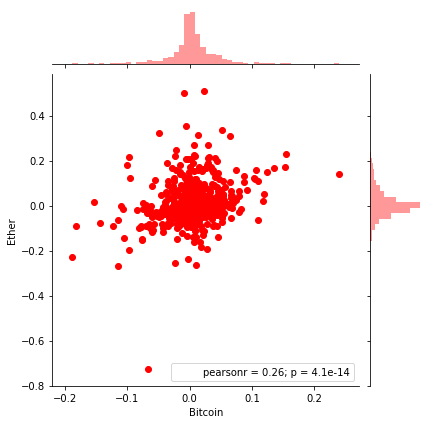

In [53]:
sns.jointplot('Bitcoin', 'Ether',returns_pct_df,kind='scatter',color='red')

This shows that there is a significant positive correlation between Bitcoin and Ethereum "Daily" percentage returns from Sept 2015 to Sept 2017.

In [56]:
returns_pct_df.head()

,Bitcoin,Ether
Date,,
2015-08-07,NaN,NaN
2015-08-08,-0.066457,-0.728042
2015-08-09,0.015632,-0.068268
2015-08-10,-0.002301,0.009333
2015-08-11,0.022384,0.510344


In [89]:
#Trying to find Bitcoin and Ethereum return percentage "Monthly" returns 
#Concatinating Bitcoin and Ethereum Open and Close Prices in a dataframe
closing_df_monthly = pd.concat([bitcoin_by_date['Open'], bitcoin_by_date['Close'], 
                                ether_by_date['Open'], ether_by_date['Close']], axis=1)
closing_df_monthly.columns = ['Open_Bitcoin', 'Close_Bitcoin', 'Open_Ether', 'Close_Ether']
#closing_df_monthly['Date'] = pd.to_datetime(closing_df_monthly['Date'])

In [90]:
closing_df_monthly['bitcoin_profit'] = closing_df_monthly['Close_Bitcoin'] - closing_df_monthly['Open_Bitcoin']
closing_df_monthly['Ether_profit'] = closing_df_monthly['Close_Ether'] - closing_df_monthly['Open_Ether']

In [82]:
closing_df_monthly = closing_df_monthly.groupby([(closing_df_monthly.Date.dt.year),
                                                 (closing_df_monthly.Date.dt.month)]).sum()

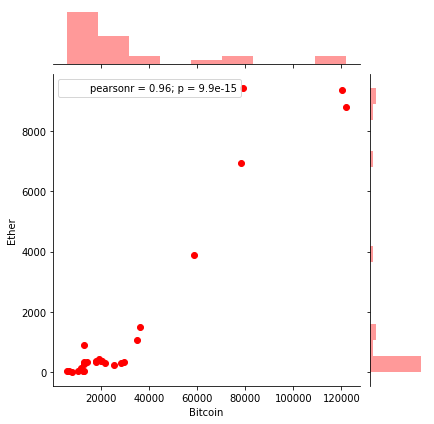

In [84]:
sns.jointplot('Bitcoin', 'Ether',closing_df_monthly,kind='scatter',color='red')

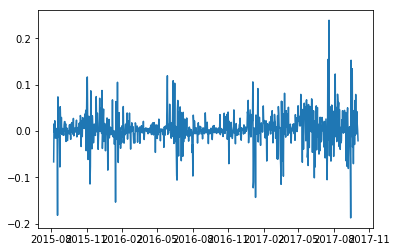

In [16]:
plt.plot(returns_pct_df.Bitcoin)

In [22]:
#Value at risk using Empirical Quantiles
returns_pct_df['Bitcoin'].quantile(0.05)

-0.05409873966894836

The 0.05 empirical quantile of daily returns is at -0.054. That means that with 95% confidence, our worst daily loss will not exceed 5.4%. If we have a 1 thousand dollar investment, our one-day 5% VaR is 0.054 * 1,000 = $54.

In [23]:
returns_pct_df['Ether'].quantile(0.05)

-0.09052367778836087

The 0.05 empirical quantile of daily returns is at -0.09. That means that with 95% confidence, our worst daily loss will not exceed 9%. If we have a 1 thousand dollar investment, our one-day 5% VaR is 0.09 * 1,000 = $90.

In [17]:
#Value at risk using Monte Carlo

days = 30
dt = 1/30
mu = returns_pct_df.mean()['Bitcoin']
sigma = returns_pct_df.std()['Bitcoin']

In [18]:
def currency_monte_carlo(start_price, days, mu, sigma):
    price = np.zeros(days)
    price[0] = start_price
    
    shock = np.zeros(days)
    drift = np.zeros(days)
    for x in range(1,days):
        shock[x] = np.random.normal(loc=mu*dt, scale=sigma*np.sqrt(dt))
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

In [29]:
bitcoin.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-10-03,4408.46,4432.47,4258.89,4317.48,"1,288,020,000","73,181,300,000"
1,2017-10-02,4395.81,4470.23,4377.46,4409.32,"1,431,730,000","72,963,200,000"
2,2017-10-01,4341.05,4403.74,4269.81,4403.74,"1,208,210,000","72,047,300,000"
3,2017-09-30,4166.11,4358.43,4160.86,4338.71,"1,207,450,000","69,136,600,000"
4,2017-09-29,4171.62,4214.63,4039.29,4163.07,"1,367,050,000","69,219,200,000"


In [20]:
start_price_bitcoin = 4408.46

Text(0.5,1,'Monte Carlo Analysis for Bitcoin')

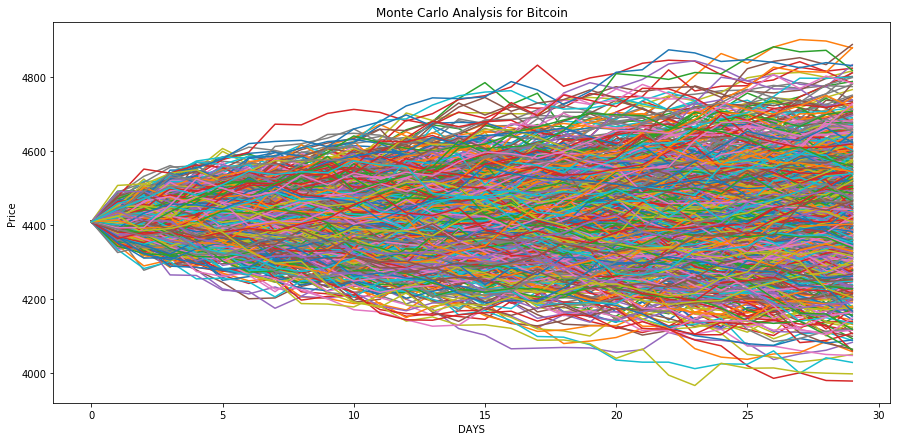

In [21]:
fig, ax = plt.subplots(ncols=1, figsize=(15,7))
for run in range(1000):
    ax.plot(currency_monte_carlo(start_price_bitcoin, days, mu, sigma))


ax.set_xlabel('DAYS')
ax.set_ylabel('Price')
ax.set_title('Monte Carlo Analysis for Bitcoin')

In [22]:
runs = 10000

simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = currency_monte_carlo(start_price_bitcoin, days, mu, sigma)[days -1]

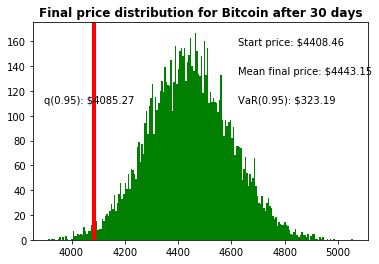

In [23]:
q = np.percentile(simulations, 1)

plt.hist(simulations, bins =200, color="green")

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price_bitcoin)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.95): $%.2f" % (start_price_bitcoin - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.95): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Bitcoin after %s days" % days, weight='bold');

This basically means for every initial bitcoin you purchase your putting about $305.55 at risk 99% of the time from our Monte Carlo Simulation.

In [41]:
ether.head()

,Date,Open,High,Low,Close,Volume,Market Cap
0,2017-10-03,297.48,300.11,288.13,292.46,"321,680,000","28,238,500,000"
1,2017-10-02,302.48,302.92,294.58,297.48,"339,443,000","28,708,500,000"
2,2017-10-01,301.55,303.19,295.06,302.34,"306,185,000","28,615,200,000"
3,2017-09-30,291.48,303.96,291.11,301.46,"332,439,000","27,655,200,000"
4,2017-09-29,299.12,299.92,279.77,291.47,"541,375,000","28,375,900,000"


In [42]:
start_price_ether = 297.48

Text(0.5,1,'Monte Carlo Analysis for Ether')

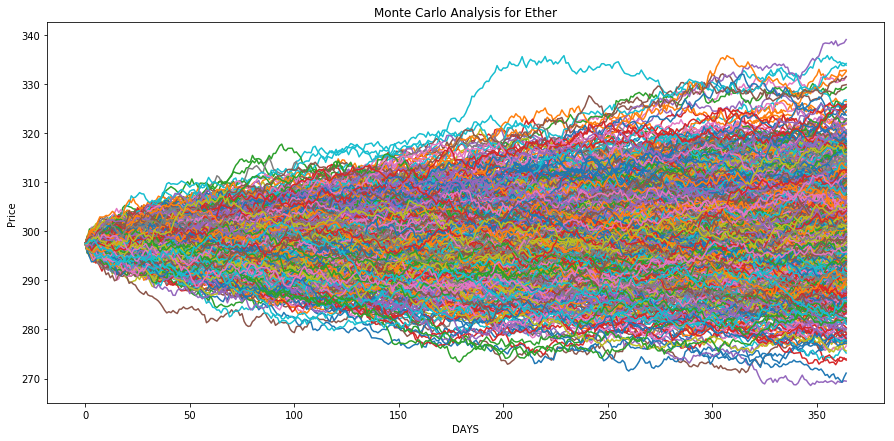

In [43]:
fig, ax = plt.subplots(ncols=1, figsize=(15,7))
for run in range(1000):
    ax.plot(currency_monte_carlo(start_price_ether, days, mu, sigma))


ax.set_xlabel('DAYS')
ax.set_ylabel('Price')
ax.set_title('Monte Carlo Analysis for Ether')

In [44]:
runs = 10000

simulations_e = np.zeros(runs)

for run in range(runs):
    simulations_e[run] = currency_monte_carlo(start_price_ether, days, mu, sigma)[days -1]

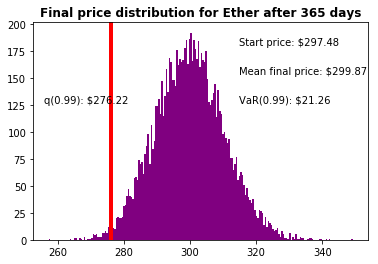

In [47]:
q = np.percentile(simulations_e, 1)

plt.hist(simulations_e, bins =200, color='purple')

# Starting Price
plt.figtext(0.6, 0.8, s="Start price: $%.2f" %start_price_ether)
# Mean ending price
plt.figtext(0.6, 0.7, "Mean final price: $%.2f" % simulations_e.mean())

# Variance of the price (within 99% confidence interval)
plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price_ether - q,))

# Display 1% quantile
plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

# Plot a line at the 1% quantile result
plt.axvline(x=q, linewidth=4, color='r')

# Title
plt.title(u"Final price distribution for Ether after %s days" % days, weight='bold');

This basically means for every initial ethereum you purchase your putting about $21.26 at risk 99% of the time from our Monte Carlo Simulation.